## Capstone II Machine Learning - NLP

Outline
1. Data
2. Model Selection
3. Linear SVC
4. Random Forest Classifier
5. Logistic Regression

### 1. Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import gc
gc.enable()
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df = pd.read_pickle('capstone2_balanced_withfeatures')
# create a dataframe that only contains label and tokenized url
df_model = df.loc[:,['category', 'tokenized_url']]

In [5]:
# make category values numeric
category = {'benign':1, 'phishing':2, 'malicious':3}
df_model.category = [category[item] for item in df_model.category]
# assemble all tokens
url_tokens = [f'{str(i)}' for i in df_model['tokenized_url']]

In [ ]:
url_tokens

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = url_tokens
vectorizer = TfidfVectorizer(lowercase=False)
X = vectorizer.fit_transform(corpus)

y = df_model['category']

In [7]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Selection

Supervised learning algorithms capable of multi-class classification were explored. Prior to any pre-processing or normalization, baseline scores are gathered for multiple classfiers.

LogisticRegression
****Results****
Accuracy: 94.8833%
Log Loss: 0.22215939857510147
Confusion matrix, without normalization
[[1949   49    4]
 [  49 1892   55]
 [  20  130 1852]]
Normalized confusion matrix
[[0.97352647 0.02447552 0.001998  ]
 [0.0245491  0.94789579 0.02755511]
 [0.00999001 0.06493506 0.92507493]]


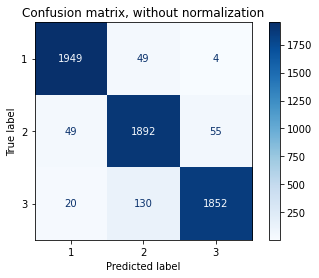

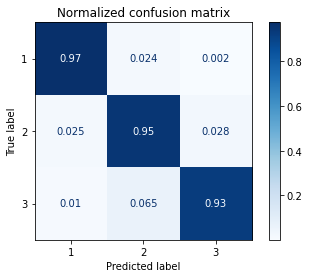

MultinomialNB
****Results****
Accuracy: 93.2000%
Log Loss: 0.2573671507739967
Confusion matrix, without normalization
[[1967   31    4]
 [ 116 1834   46]
 [  61  150 1791]]
Normalized confusion matrix
[[0.98251748 0.01548452 0.001998  ]
 [0.05811623 0.91883768 0.02304609]
 [0.03046953 0.07492507 0.89460539]]


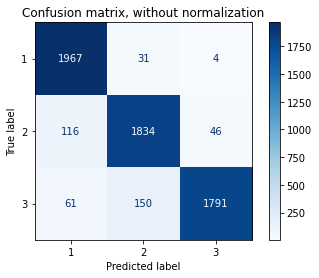

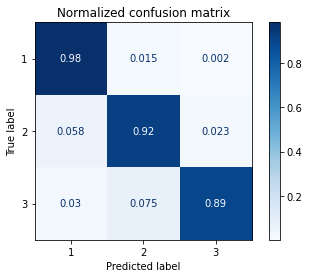

RandomForestClassifier
****Results****
Accuracy: 95.0167%
Log Loss: 0.17541288637742158
Confusion matrix, without normalization
[[1929   63   10]
 [  39 1868   89]
 [   3   95 1904]]
Normalized confusion matrix
[[0.96353646 0.03146853 0.004995  ]
 [0.01953908 0.93587174 0.04458918]
 [0.0014985  0.04745255 0.95104895]]


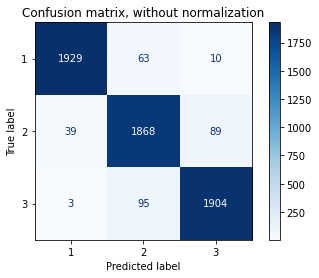

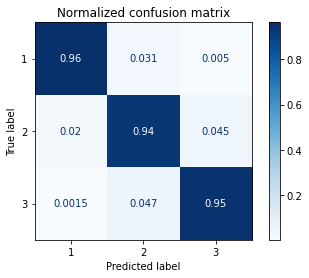

In [11]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

classifiers = [
    LogisticRegression(),
    MultinomialNB(),
    RandomForestClassifier(),
    ]
# create a dataframe to hold scores
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)


for classifier in classifiers:
    name = classifier.__class__.__name__
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   

    #print("model score: %.3f" % pipe.score(X_test, y_test))

    print("="*30)
    print(name)
    print('****Results****')
    train_predictions = pipe.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = pipe.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    

    # Plot non-normalized & normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)
    plt.show()
    
    
print("="*30)



LogisticRegression
****Results****
Accuracy: 94.8833%
Confusion matrix, without normalization
[[1949   49    4]
 [  49 1892   55]
 [  20  130 1852]]
Normalized confusion matrix
[[0.97352647 0.02447552 0.001998  ]
 [0.0245491  0.94789579 0.02755511]
 [0.00999001 0.06493506 0.92507493]]


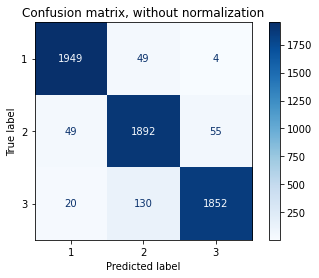

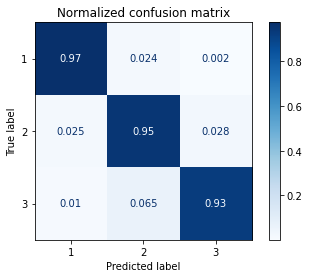

MultinomialNB
****Results****
Accuracy: 93.2000%
Confusion matrix, without normalization
[[1967   31    4]
 [ 116 1834   46]
 [  61  150 1791]]
Normalized confusion matrix
[[0.98251748 0.01548452 0.001998  ]
 [0.05811623 0.91883768 0.02304609]
 [0.03046953 0.07492507 0.89460539]]


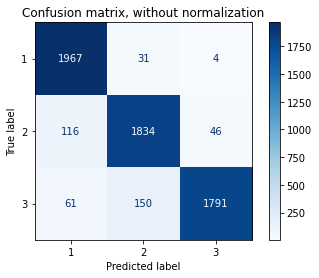

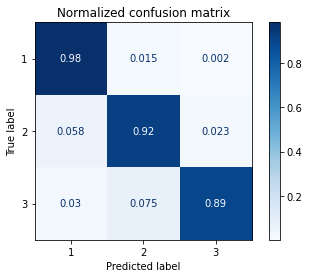

LinearSVC
****Results****
Accuracy: 96.2333%
Confusion matrix, without normalization
[[1963   37    2]
 [  26 1933   37]
 [   7  117 1878]]
Normalized confusion matrix
[[0.98051948 0.01848152 0.000999  ]
 [0.01302605 0.96843687 0.01853707]
 [0.0034965  0.05844156 0.93806194]]


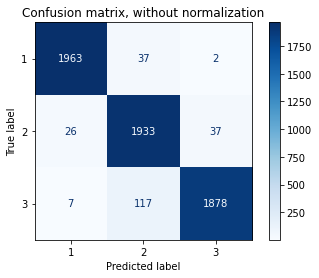

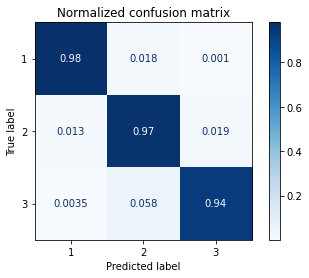

RandomForestClassifier
****Results****
Accuracy: 95.0667%
Confusion matrix, without normalization
[[1936   59    7]
 [  39 1865   92]
 [   3   96 1903]]
Normalized confusion matrix
[[0.96703297 0.02947053 0.0034965 ]
 [0.01953908 0.93436874 0.04609218]
 [0.0014985  0.04795205 0.95054945]]


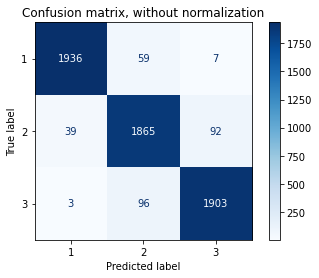

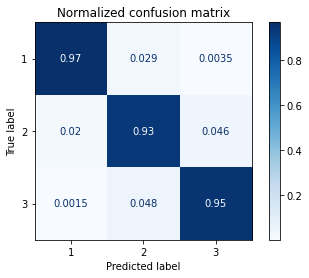

In [18]:
# Including LinearSVC; dropping log loss scoring 

from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

classifiers = [
    LogisticRegression(),
    MultinomialNB(),
    LinearSVC(),
    RandomForestClassifier(),
    ]

# create a dataframe to hold scores
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)


for classifier in classifiers:
    name = classifier.__class__.__name__
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   

    #print("model score: %.3f" % pipe.score(X_test, y_test))

    print("="*30)
    print(name)
    print('****Results****')
    train_predictions = pipe.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100]], columns=log_cols)
    log = log.append(log_entry)

    # Plot confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)
    plt.show()
    
    
print("="*30)


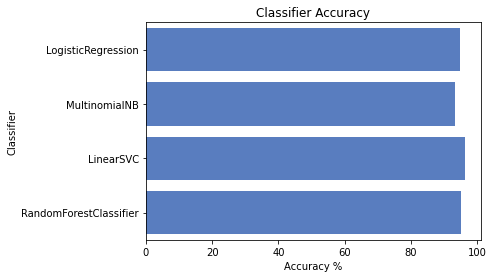

In [19]:
# plot accuracy scores

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

plt.show()

Since these baseline scores are higher than our model using a 96 predictor feature set ( see URL Classification - Machine Learning with Lexical Feature Set), we continue to develop the top 3 classifiers - LinearSVC, Random Forest Classifier and Logistic Regression.

### LinearSVC 

In [49]:
# determine available paramteters
LinearSVC().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

In [18]:
# Parameter Tuning with GridSearchCV

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer
corpus = url_tokens
vectorizer = TfidfVectorizer(lowercase=False)
X = vectorizer.fit_transform(corpus)
y = df_model['category']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lsvc = LinearSVC()         

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}


grid = GridSearchCV(LinearSVC(), param_grid, cv=3)
grid.fit(X_train,y_train)

print("Best hpyerparameters :(best parameters) ", grid.best_params_)
print("accuracy :",grid.best_score_)

Best hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2'}
accuracy : 0.9592083333333333


In [19]:
# Cross Validation

from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.20)

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=5)
clf = LinearSVC(C = 1, penalty = 'l2')
pipe = Pipeline(steps=[('clf', clf)])
results_kfold = model_selection.cross_val_score(pipe, X, y, cv=kfold)

print("Accuracy scores:",results_kfold)
print("Mean Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy scores: [0.96433333 0.97216667 0.88733333 0.939      0.88633333]
Mean Accuracy: 92.98%


Cross validation scores were poor - so, decided StraifiedKFold was a better choice since it maintains an equal percent of classes in train/test sets. See below.

In [29]:
# attempting stratified cross val
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
lst_accu_stratified = []

clf = LinearSVC(C = 1, penalty = 'l2')

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index] 
    clf.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold)) 
    
#Print the output. 
print('List of possible accuracy:', lst_accu_stratified) 
print('Maximum Accuracy That can be obtained from this model is: %.2f%%' %
      (max(lst_accu_stratified) * 100))
print('Minimum Accuracy: %.2f%%' % (min(lst_accu_stratified)*100)) 
print('Overall Accuracy: %.2f%%' % (mean(lst_accu_stratified)*100)) 
print('Standard Deviation is: %.4f' % stdev(lst_accu_stratified)) 

List of possible accuracy: [0.962, 0.963, 0.9616666666666667, 0.9655, 0.9633333333333334]
Maximum Accuracy That can be obtained from this model is: 96.55%
Minimum Accuracy: 96.17%
Overall Accuracy: 96.31%
Standard Deviation is: 0.0015


Our StratifiedKFold scores are much better!

List of possible accuracy: [0.962, 0.963, 0.9616666666666667, 0.9655, 0.9633333333333334]
Maximum Accuracy That can be obtained from this model is: 96.55%
Minimum Accuracy: 96.17%
Overall Accuracy: 96.31%
Standard Deviation is: 0.0015

Next step is to fit/predict and review scores.


Accuracy: 0.9625

Micro Precision: 0.9625
Micro Recall: 0.9625
Micro F1-score: 0.9625

Macro Precision: 0.9631
Macro Recall: 0.9625
Macro F1-score: 0.9626

Weighted Precision: 0.9631
Weighted Recall: 0.9625
Weighted F1-score: 0.9626

Classification Report

              precision    recall  f1-score   support

      Benign     0.9825    0.9835    0.9830      2002
    Phishing     0.9286    0.9649    0.9464      1996
   Malicious     0.9781    0.9391    0.9582      2002

    accuracy                         0.9625      6000
   macro avg     0.9631    0.9625    0.9626      6000
weighted avg     0.9631    0.9625    0.9626      6000

Confusion matrix, without normalization
[[1969   31    2]
 [  30 1926   40]
 [   5  117 1880]]
Normalized confusion matrix
[[0.98351648 0.01548452 0.000999  ]
 [0.01503006 0.96492986 0.02004008]
 [0.0024975  0.05844156 0.93906094]]


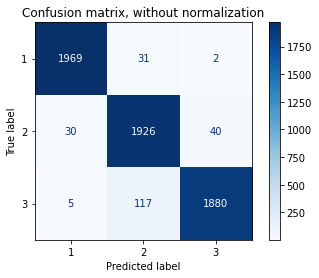

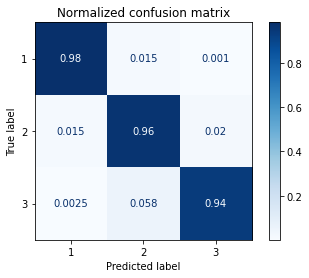

In [37]:
# predict
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = url_tokens
vectorizer = TfidfVectorizer(lowercase=False)
X = vectorizer.fit_transform(corpus)
y = df_model['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lsvc = LinearSVC(C = 10, penalty = 'l2')
clf = lsvc.fit(X_train, y_train)

predictions = clf.predict(X_test)

# print scores

print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, predictions)))

print('Micro Precision: {:.4f}'.format(precision_score(y_test, predictions, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(y_test, predictions, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(y_test, predictions, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(y_test, predictions, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(y_test, predictions, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(y_test, predictions, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(y_test, predictions, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(y_test, predictions, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(y_test, predictions, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, predictions, target_names=['Benign', 'Phishing', 'Malicious'], digits=4))
    
# Plot and display confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

### Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Grid search cross validation
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer
corpus = url_tokens
vectorizer = TfidfVectorizer(lowercase=False)
X = vectorizer.fit_transform(corpus)
y = df_model['category']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

param_grid = {'max_depth': [None],
    'max_features': [10, 20, 30, 40],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [1000]}                


grid = GridSearchCV(clf, param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best hpyerparameters :(best parameters) ", grid.best_params_)
print("accuracy :",grid.best_score_)

Best hpyerparameters :(best parameters)  {'max_depth': None, 'max_features': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
accuracy : 0.9576250000000001

In [26]:
# Cross Validation

from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.20)

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=5)
clf = RandomForestClassifier(max_features = 30, n_estimators = 1000)
pipe = Pipeline(steps=[('clf', clf)])
results_kfold = model_selection.cross_val_score(pipe, X, y, cv=kfold)

print("Accuracy scores:",results_kfold)
print("Mean Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy scores: [0.94733333 0.96333333 0.82466667 0.934      0.8565    ]
Mean Accuracy: 90.52%


Again, we use StatifiedKFold to see if we get better validation scores:

In [ ]:
# attempting stratified cross val
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
lst_accu_stratified = []

clf = RandomForestClassifier(max_features = 30, n_estimators = 1000)

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index] 
    clf.fit(x_train_fold, y_train_fold)  
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold)) 
    
#Print the output. 
print('List of possible accuracy:', lst_accu_stratified) 
print('Maximum Accuracy That can be obtained from this model is: %.2f%%' %
      (max(lst_accu_stratified) * 100))
print('Minimum Accuracy: %.2f%%' % (min(lst_accu_stratified)*100)) 
print('Overall Accuracy: %.2f%%' % (statistics.mean(lst_accu_stratified) * 100))
print('Standard Deviation is: %.4f' % statistics.stdev(lst_accu_stratified))

List of possible accuracy: [0.9631666666666666, 0.9635, 0.9633333333333334, 0.9613333333333334, 0.9615]
Maximum Accuracy That can be obtained from this model is: 96.35%
Minimum Accuracy: 96.13%
Overall Accuracy: 96.21%
Standard Deviation is: 0.0021

Nest, we fit/predict, review scores.


Accuracy: 0.9625

Micro Precision: 0.9625
Micro Recall: 0.9625
Micro F1-score: 0.9625

Macro Precision: 0.9627
Macro Recall: 0.9625
Macro F1-score: 0.9626

Weighted Precision: 0.9627
Weighted Recall: 0.9625
Weighted F1-score: 0.9626

Classification Report

              precision    recall  f1-score   support

      Benign     0.9839    0.9765    0.9802      2002
    Phishing     0.9371    0.9554    0.9462      1996
   Malicious     0.9671    0.9555    0.9613      2002

    accuracy                         0.9625      6000
   macro avg     0.9627    0.9625    0.9626      6000
weighted avg     0.9627    0.9625    0.9626      6000

Confusion matrix, without normalization
[[1955   44    3]
 [  27 1907   62]
 [   5   84 1913]]
Normalized confusion matrix
[[0.97652348 0.02197802 0.0014985 ]
 [0.01352705 0.95541082 0.03106212]
 [0.0024975  0.04195804 0.95554446]]


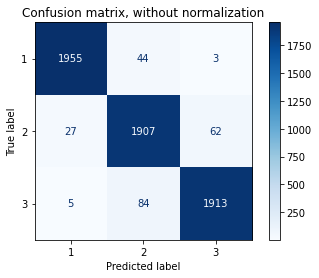

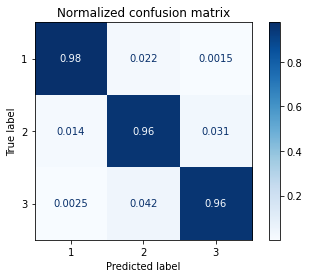

In [38]:
# Predict

from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = url_tokens
vectorizer = TfidfVectorizer(lowercase=False)
X = vectorizer.fit_transform(corpus)
y = df_model['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(max_features = 30, n_estimators = 1000)
clf = rfc.fit(X_train, y_train)

predictions = clf.predict(X_test)

# print scores

print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, predictions)))

print('Micro Precision: {:.4f}'.format(precision_score(y_test, predictions, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(y_test, predictions, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(y_test, predictions, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(y_test, predictions, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(y_test, predictions, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(y_test, predictions, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(y_test, predictions, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(y_test, predictions, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(y_test, predictions, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, predictions, target_names=['Benign', 'Phishing', 'Malicious'], digits=4))
    
# Plot and display confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [31]:
from sklearn.linear_model import LogisticRegression

# Grid search cross validation
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer
corpus = url_tokens
vectorizer = TfidfVectorizer(lowercase=False)
X = vectorizer.fit_transform(corpus)
y = df_model['category']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression()

param_grid = {'C': [.01, .1, 1, 10, 100, 1000], }                


grid = GridSearchCV(clf, param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best hpyerparameters :(best parameters) ", grid.best_params_)
print("accuracy :",grid.best_score_)

Best hpyerparameters :(best parameters)  {'C': 100}
accuracy : 0.9560416666666667


In [32]:
# Cross Validation

from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.20)

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=5)
clf = LogisticRegression(C = 1)  # this c value is wrong
pipe = Pipeline(steps=[('clf', clf)])
results_kfold = model_selection.cross_val_score(pipe, X, y, cv=kfold)

print("Accuracy scores:",results_kfold)
print("Mean Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy scores: [0.91383333 0.959      0.79333333 0.91416667 0.83466667]
Mean Accuracy: 88.30%



Accuracy: 0.9488

Micro Precision: 0.9488
Micro Recall: 0.9488
Micro F1-score: 0.9488

Macro Precision: 0.9495
Macro Recall: 0.9488
Macro F1-score: 0.9489

Weighted Precision: 0.9495
Weighted Recall: 0.9488
Weighted F1-score: 0.9489

Classification Report

              precision    recall  f1-score   support

      Benign     0.9658    0.9735    0.9697      2002
    Phishing     0.9136    0.9479    0.9304      1996
   Malicious     0.9691    0.9251    0.9466      2002

    accuracy                         0.9488      6000
   macro avg     0.9495    0.9488    0.9489      6000
weighted avg     0.9495    0.9488    0.9489      6000

Confusion matrix, without normalization
[[1949   49    4]
 [  49 1892   55]
 [  20  130 1852]]
Normalized confusion matrix
[[0.97352647 0.02447552 0.001998  ]
 [0.0245491  0.94789579 0.02755511]
 [0.00999001 0.06493506 0.92507493]]


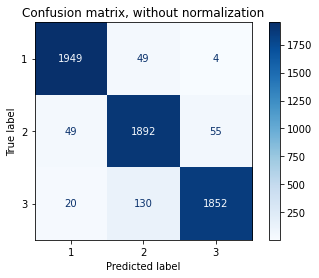

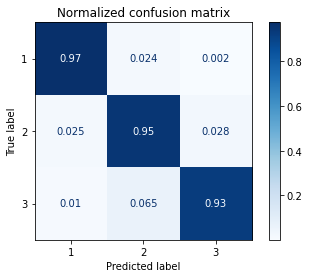

In [39]:
# Predict

from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = url_tokens
vectorizer = TfidfVectorizer(lowercase=False)
X = vectorizer.fit_transform(corpus)
y = df_model['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(C = 1)
clf = lr.fit(X_train, y_train)

predictions = clf.predict(X_test)

# print scores

print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, predictions)))

print('Micro Precision: {:.4f}'.format(precision_score(y_test, predictions, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(y_test, predictions, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(y_test, predictions, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(y_test, predictions, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(y_test, predictions, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(y_test, predictions, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(y_test, predictions, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(y_test, predictions, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(y_test, predictions, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, predictions, target_names=['Benign', 'Phishing', 'Malicious'], digits=4))
    
# Plot and display confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

Summary:
While both features sets produced scores of 90% or higher, the feature set leveraging natural language processing achieved the best scores. LinearSVC and RandomForest Classifiers trained on matrices with url token TF-IDF scores tied with an overall accuracy score of 96.25. 

Focusing on recall scores, the Random Forest Classifier model returned the highest score for predicting positive malicious urls, while the LinearSVC model returned the highest recall scores for benign and phishing urls.

It’s important to note the lightweight nature of both models, which leverage url strings as the basis for feature development.

Next Steps:
Additional steps, such as stacking multiple classifiers, may be taken to improve model performance.